In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier, Lasso
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [67]:
train_x = np.array(pd.read_csv('train_X.csv',index_col=0))
train_y = np.array(pd.read_csv('train_y.csv',index_col=0))
test_x = np.array(pd.read_csv('test_X.csv',index_col=0))
TEST_ID = pd.read_csv('test_X.csv',index_col=0).index

### 1. Binary classification with linear models

In [77]:
###!!! Grading criteria:
# +1 points for Having at least one trial of linear regression
# Self-made script is acceptable

model = LinearRegression().fit(train_x, train_y.reshape(-1))
ty = model.predict(test_x)

ret = {"ID":TEST_ID, 'xml_neoplasm_histologic_grade':(ty>0.5).astype(int)}
ret = pd.DataFrame(data=ret)
ret.set_index('ID')
ret.to_csv('LR.csv', index=False)

#### 2. Develop a pipeline to try different linear models 

In [80]:
###!!! Grading criteria:
# +1 points for having at least two other regression methods other than linear regression
# Prefer making a function/class to take regressors as input

def worker(model, preprocessor=lambda x:x, save_to='submission.csv'):
    x = preprocessor(train_x)
    tx = preprocessor(test_x)
    assert len(x)==len(train_y)
    
    model = model.fit(x, train_y)
    ty = model.predict(tx)
    
    ret = {"ID":TEST_ID, 'xml_neoplasm_histologic_grade':ty}
    ret = pd.DataFrame(data=ret)
    ret.set_index('ID')
    ret.to_csv(save_to, index=False)
    
worker(LogisticRegression(random_state=0), save_to='LogisticRegression.csv')
worker(RidgeClassifier(), save_to='RidgeRegression.csv')

#### 3. Study the effect of regularization parameters on model performance

In [83]:
###!!! Grading criteria:
# +1 points for optimizing hyperparameter for at least one regression method

worker(RidgeClassifier(alpha=0.0001), save_to='RidgeRegression0.0001.csv')
worker(RidgeClassifier(alpha=10000.0), save_to='RidgeRegression10000.csv')

/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:1222: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### 4. Compare your best model accuracy with random guessing 

In [ ]:
###!!! Grading criteria:
# +1 points for comparing results with random answer
# can be merged into the summary paragraph

# method                        | public score | private score
# Random guess                  | 0.72000      | 0.71428
# Linear Regresion              | 0.86153      | 0.90410
# Ridge Regresion               | 0.86153      | 0.90410
# Ridge Regresion(alpha=10000)  | 0.87499      | 0.90410
# Ridge Regresion(alpha=0.0001) | 0.86153      | 0.90410

#### 5. What are the top important genes for the model decision

In [ ]:
###!!! Grading criteria:
# +1 points for having a discussion about the top important genes
# can be merged into the summary paragraph

#### 6. Visualize the dataset

/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shuhao/softwares/miniconda3/envs/autoani/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


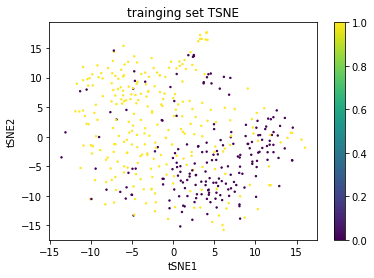

In [49]:
###!!! Grading criteria:
# +1 points for at least having a simple visualization plot of training set
# May also try visualizing preprocessed dataset
tsne_coords = TSNE(n_components=2).fit_transform(train_x)
plt.scatter(tsne_coords[:,0], tsne_coords[:,1], c=train_y, s=2)
plt.xlabel("tSNE1")
plt.ylabel("tSNE2")
plt.title("trainging set TSNE")
plt.colorbar()

In [ ]:
### Random guess:
### Score: 0.72000/0.71428

In [ ]:
### Naive solution: 
### Take only the first 10 columns for logistic regression
### Score: 0.84057/0.81159

train_x = np.array(pd.read_csv('train_X.csv',index_col=0))
train_y = np.array(pd.read_csv('train_y.csv',index_col=0))
test_x = np.array(pd.read_csv('test_X.csv',index_col=0))

model = LogisticRegression(random_state=0).fit(train_x[:,:10], train_y)
ret = model.predict(test_x[:,:10])

test_y = pd.read_csv('test_y.csv',index_col=0)
test_y['xml_neoplasm_histologic_grade'] = ret
test_y.to_csv('test_submission-vanilla_model.csv')

In [ ]:
### This is the script to split the training and test set

df = pd.read_csv('UCEC_clr_X.csv',index_col=0)

np.random.seed = 10032022
idx = np.arange(554)
np.random.shuffle(idx)
train_idx = idx[:444]
test_idx = idx[444:]

train_X = df.iloc[train_idx,:]
train_X.to_csv('train_X.csv')
test_X = df.iloc[test_idx,:]
test_X.to_csv('test_X.csv')

df_y = pd.read_csv('UCEC_clr_y.csv',index_col=0)
train_y = df_y.iloc[train_idx,:]
train_y.to_csv('train_y.csv')
test_y = df_y.iloc[test_idx,:]
test_y.to_csv('test_y.csv')